In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

# Extraction

In [3]:
url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/08/2025-07.csv"
csv_file_name = "data.csv"

try:
    response = requests.get(url, timeout=1200)
    response.raise_for_status()
    print("Descarga completada con éxito")
except requests.exceptions.Timeout as e:
    print(f"Error de timeout durante la descarga: {e}")
    df_raw = pd.DataFrame
except requests.exceptions.RequestException as e:
    print(f"Error durante la descarga: {e}")
    df_raw = pd.DataFrame()

Descarga completada con éxito


In [ ]:
with open(csv_file_name, 'wb') as f:
    f.write(response.content)
print(f"Archivo  guardado como {csv_file_name}")

print(f"Leyendo datos desde: {csv_file_name}")
df_raw = pd.read_csv(csv_file_name)
print("Extracción completada con éxito")


Archivo zip guardado como data.csv
Leyendo datos desde: data.csv
Extracción completada con éxito


In [7]:
print("Tamaño del DataFrame:")
print(df_raw.shape)

print("Previsualización del DataFrame")
display(df_raw.head(20))

Tamaño del DataFrame:
(1663896, 9)
Previsualización del DataFrame


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11
1,M,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21
2,M,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24
3,M,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27
4,M,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46
5,M,19.0,2053122,137,30/06/2025,23:33:00,343,01/07/2025,00:00:52
6,M,48.0,4574182,124,30/06/2025,23:46:14,576,01/07/2025,00:00:58
7,M,28.0,8244592,595,30/06/2025,23:47:40,618,01/07/2025,00:01:16
8,M,39.0,7042187,160,30/06/2025,23:17:37,255,01/07/2025,00:01:28
9,M,48.0,6648281,271-272,30/06/2025,23:49:30,545,01/07/2025,00:01:30


# Transformation
Important for data quality:
- accuracy
- completeness
- consistency 
- uniqueness

## Limpieza

In [42]:
df = df_raw.copy()

# formato de fechas
print("Tipos de datos previos")
print(df[['Fecha_Arribo', 'Fecha_Retiro']].dtypes)

df['FechaHora_Retiro'] = pd.to_datetime(
    df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'],
    format='%d/%m/%Y %H:%M:%S'  # Ajusta el formato según tus datos
)

df['FechaHora_Arribo'] = pd.to_datetime(
    df['Fecha_Arribo'] + ' ' + df['Hora_Arribo'],
    format='%d/%m/%Y %H:%M:%S'  # Ajusta el formato según tus datos
)

print("Tipos de datos tras transformación")
print(df[['FechaHora_Arribo', 'FechaHora_Retiro']].dtypes)

print("Previsualización del DataFrame después de la conversión:")
display(df.head())

Tipos de datos previos
Fecha_Arribo    object
Fecha_Retiro    object
dtype: object
Tipos de datos tras transformación
FechaHora_Arribo    datetime64[ns]
FechaHora_Retiro    datetime64[ns]
dtype: object
Previsualización del DataFrame después de la conversión:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,FechaHora_Retiro,FechaHora_Arribo
0,M,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,2025-06-30 23:33:59,2025-07-01 00:00:11
1,M,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,2025-06-30 23:41:24,2025-07-01 00:00:21
2,M,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,2025-06-30 23:48:16,2025-07-01 00:00:24
3,M,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,2025-06-30 23:52:12,2025-07-01 00:00:27
4,M,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,2025-06-30 23:54:55,2025-07-01 00:00:46


In [43]:
# revisar valores nulos
print("Valores nulos previos")
print(df.isnull().sum())

#para genero eliminar registros con null y quitar registros con ?
df.dropna(subset=['Genero_Usuario'], inplace=True)
df = df[df['Genero_Usuario'] != '?'] 

#para edad también eliminar registros
df.dropna(subset=['Edad_Usuario'], inplace=True)

print("Valores nulos tras limpieza")
print(df.isnull().sum())

Valores nulos previos
Genero_Usuario            3
Edad_Usuario             80
Bici                      0
Ciclo_Estacion_Retiro     0
Fecha_Retiro              0
Hora_Retiro               0
Ciclo_EstacionArribo      0
Fecha_Arribo              0
Hora_Arribo               0
FechaHora_Retiro          0
FechaHora_Arribo          0
dtype: int64
Valores nulos tras limpieza
Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_EstacionArribo     0
Fecha_Arribo             0
Hora_Arribo              0
FechaHora_Retiro         0
FechaHora_Arribo         0
dtype: int64


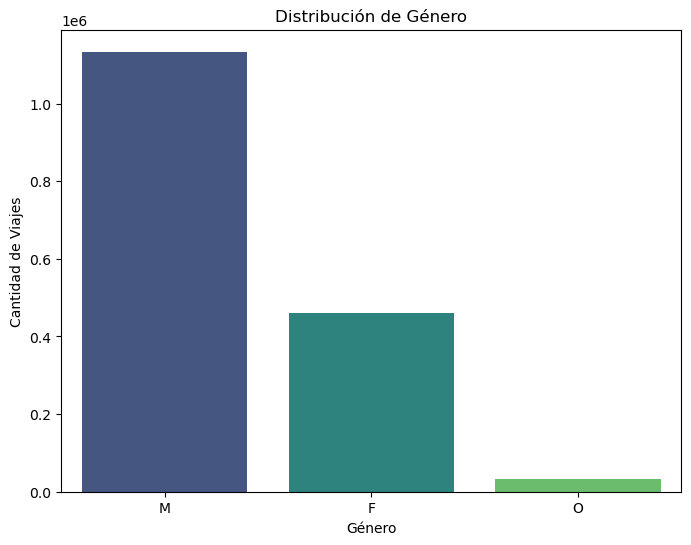

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genero_Usuario', palette='viridis', hue='Genero_Usuario', legend=False)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Viajes')
plt.show()

In [35]:
# Aplicar encoding a genero
df_encoded = pd.get_dummies(df, columns=['Genero_Usuario'], prefix=['genero'])

print("DataFrame después de One-Hot Encoding:")
display(df_encoded.head())

print("Viajes x genero")
print(df['Genero_Usuario'].value_counts())

DataFrame después de One-Hot Encoding:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,genero_?,genero_F,genero_M,genero_O
0,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11,False,False,True,False
1,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21,False,False,True,False
2,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24,False,False,True,False
3,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27,False,False,True,False
4,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46,False,False,True,False


Viajes x genero
Genero_Usuario
M    1133620
F     459853
?      38636
O      31784
Name: count, dtype: int64


In [37]:
# crear columna de duración de recorrido
df_encoded['Duracion_Recorrido'] = (df_encoded['FechaHora_Arribo'] - df_encoded['FechaHora_Retiro'])
display(df_encoded.head())

KeyError: 'FechaHora_Arribo'